<a href="https://colab.research.google.com/github/sindyalvinaa/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

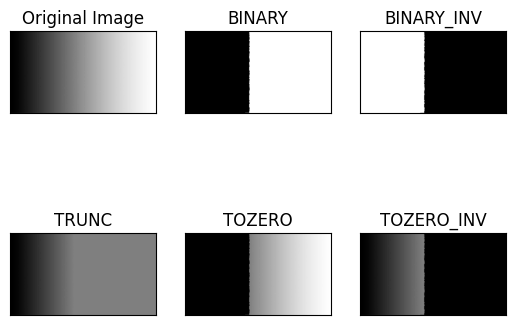

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/week10/gradient.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

<ipython-input-5-14c07ce81c9c>:22: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb
<ipython-input-5-14c07ce81c9c>:23: RuntimeWarning: invalid value encountered in true_divide
  mf = (sumb - sumb)/wf


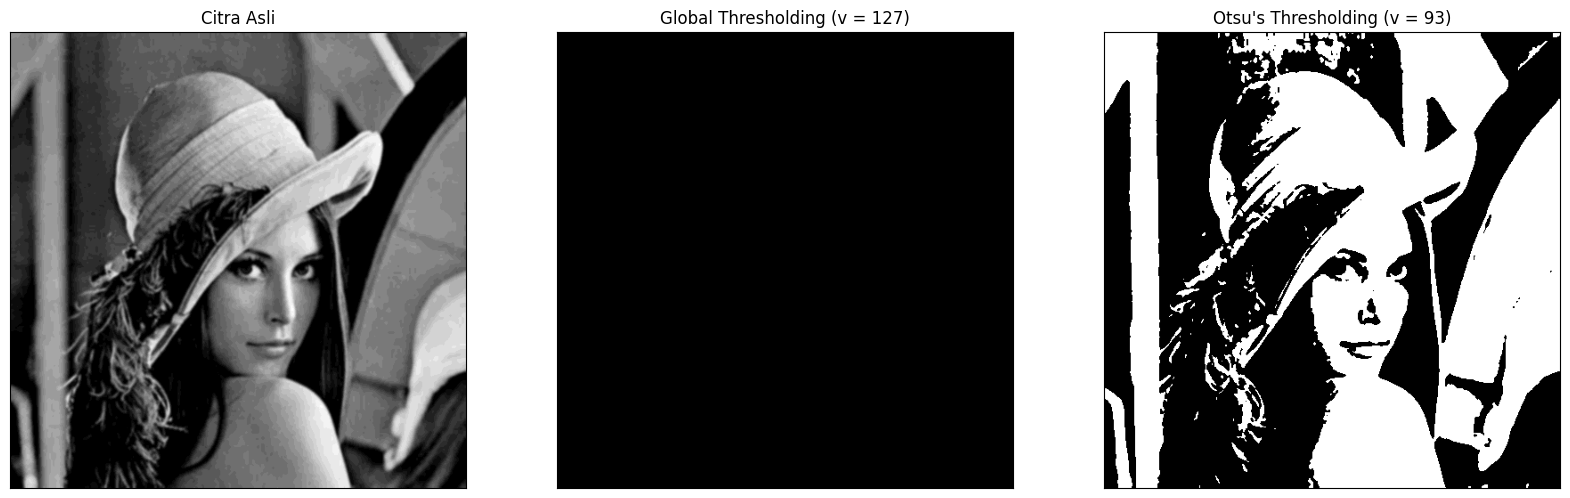

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/week10/lena_gs_lc2.jpg')
img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

hist = cv2.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,255):
  wb += hist[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

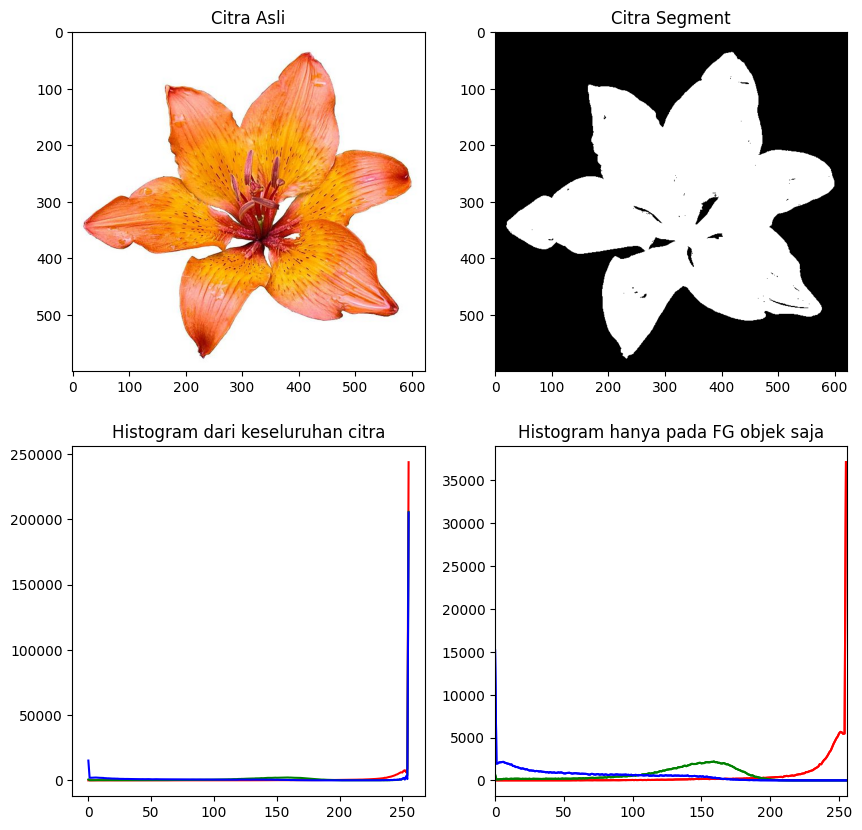

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/week10/lily.jpg')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7f01f6a3ff70>)

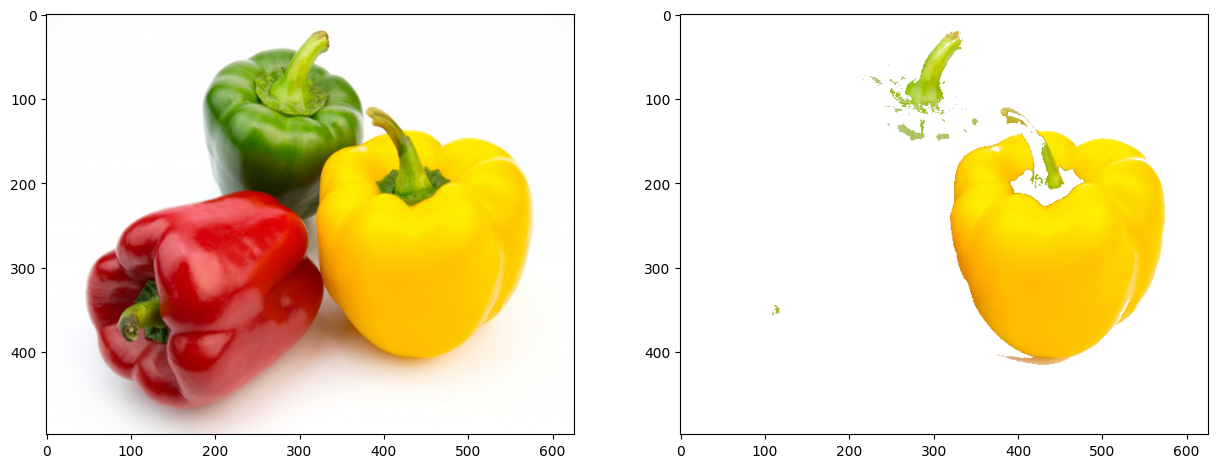

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/week10/peppers.jpg')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


pixel_values = img.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3 
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()


segmented_image = centers[labels.flatten()] 
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)


plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 

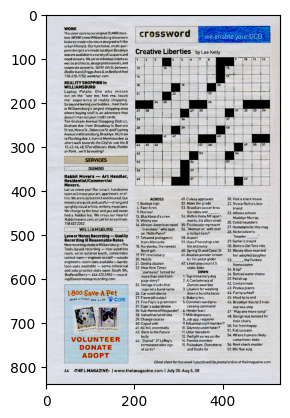

In [13]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/week10/crossword.jpg')

ret, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_TOZERO)

cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(thresh)